# UK Immigration Raids: Migrating the Data

Notebook / *pandas* example showing how to replicate spreadsheet transformations described in https://spreadsheetjournalism.com/2018/01/16/uk-immigration-raids-migrating-the-data/

## Download the file

In [1]:
url='https://spreadsheetjournalism.files.wordpress.com/2018/01/foi-42354-annex-a.xlsx'

In [2]:
#https://stackoverflow.com/a/34503421/454773
import requests

def downloadAndSave(url, outfile=None, chunk_size=2000):
    r = requests.get(url, stream=True)
    outfile = outfile if outfile else url.split('/')[-1]
    with open(outfile, 'wb') as fd:
        for chunk in r.iter_content(chunk_size):
            fd.write(chunk)
    #print('File written as: {}'.format(outfile)
    return outfile

In [3]:
filename = downloadAndSave(url, '../data/{}'.format(url.split('/')[-1]))

#Show the filename
filename

'../data/foi-42354-annex-a.xlsx'

## Load in the file

In [4]:
#pandas is a powerful library for working with tabular datasets
import pandas as pd

In [5]:
sheets=pd.read_excel(filename, sheet_name=None)
sheets.keys()

odict_keys(['ENCOUNTERED NOT ARRESTED', 'ENCOUNTERED ARRESTED'])

In [6]:
sheets['ENCOUNTERED NOT ARRESTED'].head()

,Unnamed: 0,Unnamed: 1,Encountered but not Arrestred between 03 January 2012 and 02 January 2017,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nationality,BIRMINGHAM,BRISTOL,CARDIFF,GLASGOW,LEEDS,LIVERPOOL,LONDON,MANCHESTER,NEWCASTLE,NOTTINGHAM,SHEFFIELD,Grand Total
3,AFGHANISTAN,222,10,31,51,47,42,707,125,56,22,59,1372
4,ALBANIA,27,10,12,8,13,2,215,9,3,6,11,316


We need to skip at least 3 rows. If there are initial blank lines at the top of the sheet, these will be ignored automatically  - so it may be more...

How about the bottom of the table? Are there metadata rows to drop there?

In [7]:
sheets['ENCOUNTERED NOT ARRESTED'].tail(12)

,Unnamed: 0,Unnamed: 1,Encountered but not Arrestred between 03 January 2012 and 02 January 2017,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
186,ZIMBABWE,8,2,1,10,16,5,56,16,2,5,23,144
187,NO NATIONALITY,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1
188,Grand Total,5458,663,3193,3737,1935,3050,44291,6854,2601,1024,3799,76605
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,1. These statistics have been taken from a liv...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,2. Data relates to the total number of persons...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,3. People can be encountered and subsequently ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's clear out the original spreadsheet, which was loaded into memory, and then we can load in the sheets separately.

In [8]:
sheets = None

Let's load in the data, skipping rows at the top.

In [9]:
#pd.read_excel(local_file,sheet_name='Locations',skiprows=0)
enc_not_arr =pd.read_excel(filename, 
                           sheet_name='ENCOUNTERED NOT ARRESTED', 
                           skiprows=3)
enc_not_arr.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Nationality,BIRMINGHAM,BRISTOL,CARDIFF,GLASGOW,LEEDS,LIVERPOOL,LONDON,MANCHESTER,NEWCASTLE,NOTTINGHAM,SHEFFIELD,Grand Total
1,AFGHANISTAN,222,10,31,51,47,42,707,125,56,22,59,1372
2,ALBANIA,27,10,12,8,13,2,215,9,3,6,11,316
3,ALGERIA,10,NaN,8,7,7,5,275,9,3,3,4,331
4,ANGOLA,1,NaN,NaN,NaN,1,NaN,7,1,9,NaN,1,20


Okay - we need to skip 4 rows.

In [10]:
enc_not_arr =pd.read_excel(filename, 
                           sheet_name='ENCOUNTERED NOT ARRESTED', 
                           skiprows=4)
enc_not_arr.head()

,Nationality,BIRMINGHAM,BRISTOL,CARDIFF,GLASGOW,LEEDS,LIVERPOOL,LONDON,MANCHESTER,NEWCASTLE,NOTTINGHAM,SHEFFIELD,Grand Total
0,AFGHANISTAN,222.0,10.0,31.0,51.0,47.0,42.0,707.0,125.0,56.0,22.0,59.0,1372.0
1,ALBANIA,27.0,10.0,12.0,8.0,13.0,2.0,215.0,9.0,3.0,6.0,11.0,316.0
2,ALGERIA,10.0,NaN,8.0,7.0,7.0,5.0,275.0,9.0,3.0,3.0,4.0,331.0
3,ANGOLA,1.0,NaN,NaN,NaN,1.0,NaN,7.0,1.0,9.0,NaN,1.0,20.0
4,ARGENTINA,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,19.0


How about the bottom of the table? There is a `skip_footer` argument we can use, but the number of metadata rows may be uncertain.

It is more robust to find the index of the last row of the table and then drop rows following that.

In [11]:
# View 'Grand Total' row
enc_not_arr[enc_not_arr['Nationality']=='Grand Total']

,Nationality,BIRMINGHAM,BRISTOL,CARDIFF,GLASGOW,LEEDS,LIVERPOOL,LONDON,MANCHESTER,NEWCASTLE,NOTTINGHAM,SHEFFIELD,Grand Total
185,Grand Total,5458.0,663.0,3193.0,3737.0,1935.0,3050.0,44291.0,6854.0,2601.0,1024.0,3799.0,76605.0


In [12]:
# Get index of 'Grand Total' row
index = enc_not_arr[enc_not_arr['Nationality']=='Grand Total'].index[0]
index

185

In [13]:
#Include rows above the Grand Total row 
enc_not_arr = enc_not_arr[enc_not_arr.index < index]

enc_not_arr.tail()

,Nationality,BIRMINGHAM,BRISTOL,CARDIFF,GLASGOW,LEEDS,LIVERPOOL,LONDON,MANCHESTER,NEWCASTLE,NOTTINGHAM,SHEFFIELD,Grand Total
180,WESTERN SAHARA,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
181,YEMEN,4.0,NaN,6.0,1.0,NaN,22.0,7.0,9.0,NaN,NaN,10.0,59.0
182,ZAMBIA,1.0,NaN,3.0,1.0,1.0,1.0,15.0,4.0,NaN,1.0,3.0,30.0
183,ZIMBABWE,8.0,2.0,1.0,10.0,16.0,5.0,56.0,16.0,2.0,5.0,23.0,144.0
184,NO NATIONALITY,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0


Let's also exclude the *Grand Total* column.

In [14]:
enc_not_arr.drop(['Grand Total'], axis=1, inplace = True)

Let's guess the other sheet is the same...

In [15]:
enc_arr = pd.read_excel(filename, 
                           sheet_name='ENCOUNTERED ARRESTED', 
                           skiprows=4)

enc_arr.head()

,Nationality,BIRMINGHAM,BRISTOL,CARDIF,GLASGOW,LEEDS,LIVERPOOL,LONDON,MANCHESTER,NEWCASTLE,NOTTINGHAM,SHEFIELD,Grand Total
0,AFGHANISTAN,189.0,20.0,42.0,21.0,36.0,22.0,433.0,58.0,24.0,4.0,38.0,887.0
1,ALBANIA,40.0,38.0,58.0,21.0,7.0,36.0,375.0,28.0,19.0,8.0,25.0,655.0
2,ALGERIA,7.0,2.0,11.0,6.0,13.0,30.0,286.0,6.0,4.0,2.0,6.0,373.0
3,ANGOLA,NaN,NaN,NaN,NaN,2.0,NaN,8.0,3.0,3.0,NaN,1.0,17.0
4,ANTIGUA AND BARBUDA,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0


In [16]:
index = enc_arr[enc_arr['Nationality']=='Grand Total'].index[0]
index

KeyError: 'Nationality'

Hmm... that seems to throw an error with the *Nationality* column name not being recognised... Let's check the column names.

In [17]:
enc_arr.columns

Index(['Nationality ', 'BIRMINGHAM', 'BRISTOL', 'CARDIF', 'GLASGOW', 'LEEDS',
       'LIVERPOOL', 'LONDON', 'MANCHESTER', 'NEWCASTLE', 'NOTTINGHAM',
       'SHEFIELD', 'Grand Total'],
      dtype='object')

Ah, so there's a space. We can remove spaces from the column names and rename the columns after dropping the *Grand Total* column.

In [18]:
enc_arr.drop(['Grand Total'], axis=1, inplace = True)
enc_arr.columns = [col.strip() for col in enc_arr.columns]

In [19]:
#Include rows above the Grand Total row
index = enc_arr[enc_arr['Nationality']=='Grand Total'].index[0]
enc_arr = enc_arr[enc_arr.index < index]

enc_arr.tail()

,Nationality,BIRMINGHAM,BRISTOL,CARDIF,GLASGOW,LEEDS,LIVERPOOL,LONDON,MANCHESTER,NEWCASTLE,NOTTINGHAM,SHEFIELD
165,VENEZUALA,NaN,NaN,NaN,NaN,1.0,NaN,13.0,1.0,NaN,NaN,NaN
166,VIETNAM,22.0,5.0,30.0,37.0,29.0,25.0,189.0,13.0,35.0,10.0,24.0
167,YEMEN,2.0,NaN,1.0,NaN,2.0,7.0,2.0,1.0,NaN,NaN,2.0
168,ZAMBIA,1.0,1.0,3.0,NaN,3.0,NaN,7.0,4.0,NaN,NaN,1.0
169,ZIMBABWE,4.0,1.0,6.0,1.0,11.0,1.0,19.0,10.0,3.0,NaN,6.0


In [20]:
#Check sum against original blog post - claimed as: 1143
print( enc_arr['BRISTOL'].sum(), enc_not_arr['BRISTOL'].sum() )
print( enc_arr['BRISTOL'].sum() + enc_not_arr['BRISTOL'].sum() )

480.0 663.0
1143.0


We should probably also do the same for the other table to make sure there is no white space around city names in those column headings.

In [21]:
enc_not_arr.columns = [col.strip() for col in enc_not_arr.columns]

## Pivot the data

The data tables we have loaded in are in *wide* format. The data is often easier to work with in a *long* format.

For example, if we "twist" or pivot the cities in the column names into a column of their own, and the values in to a "value" column, each row will contain a value that represents the arrests of each nationality in each city.

We can do this using the `melt` operation.

In [22]:
pd.melt(enc_not_arr, id_vars='Nationality').head()

,Nationality,variable,value
0,AFGHANISTAN,BIRMINGHAM,222.0
1,ALBANIA,BIRMINGHAM,27.0
2,ALGERIA,BIRMINGHAM,10.0
3,ANGOLA,BIRMINGHAM,1.0
4,ARGENTINA,BIRMINGHAM,NaN


In [23]:
enc_not_arr_long = pd.melt(enc_not_arr,
                           id_vars='Nationality',
                           var_name ='City',
                           value_name = 'Not Arrested')
enc_not_arr_long.head()

,Nationality,City,Not Arrested
0,AFGHANISTAN,BIRMINGHAM,222.0
1,ALBANIA,BIRMINGHAM,27.0
2,ALGERIA,BIRMINGHAM,10.0
3,ANGOLA,BIRMINGHAM,1.0
4,ARGENTINA,BIRMINGHAM,NaN


In [24]:
enc_arr_long = pd.melt(enc_arr,
                       id_vars='Nationality',
                       var_name = 'City',
                       value_name = 'Arrested',)
enc_arr_long.head()

,Nationality,City,Arrested
0,AFGHANISTAN,BIRMINGHAM,189.0
1,ALBANIA,BIRMINGHAM,40.0
2,ALGERIA,BIRMINGHAM,7.0
3,ANGOLA,BIRMINGHAM,NaN
4,ANTIGUA AND BARBUDA,BIRMINGHAM,NaN


## Merging the Data

Now we can create a single datatable by merging those two datasets based on common *Nationality* and *City*. We use an *outer join* to make sure all rows form both tables are included in the merged result.

In [25]:
enc_merge_long = enc_arr_long.merge( enc_not_arr_long, 
                                    on = ['Nationality', 'City'], 
                                    how='outer')
enc_merge_long.head()

,Nationality,City,Arrested,Not Arrested
0,AFGHANISTAN,BIRMINGHAM,189.0,222.0
1,ALBANIA,BIRMINGHAM,40.0,27.0
2,ALGERIA,BIRMINGHAM,7.0,10.0
3,ANGOLA,BIRMINGHAM,NaN,1.0
4,ANTIGUA AND BARBUDA,BIRMINGHAM,NaN,NaN


That looks okay... but we are assuming all the cities and nationalities match. Let's check that.

We'll look for names that appear in the *Nationality* (or *City*) in one of the original tables that don't appear in the other.

Let's start with *City*.

We can use a `symmetric_difference()` operator on sets of values (that is, unique collections of values) to find items that are in one list only.

In [26]:
set(['a','b','c']).symmetric_difference(set(['b','c','d']))

{'a', 'd'}

Let's apply that to see if there are differences in the menbers of the *City* column in each table.

In [27]:
set(enc_arr_long['City']).symmetric_difference(set(enc_not_arr_long['City']))

{'CARDIF', 'CARDIFF', 'SHEFFIELD', 'SHEFIELD'}

Okay, so there are some differences - and these look like near misses...

In [28]:
items_in_arr_alone = set(enc_arr_long['City']) - (set(enc_not_arr_long['City']) )
print( 'Items in enc_arr_long not in enc_not_arr_long: {}'.format(items_in_arr_alone) )

items_in_not_arr_alone = set(enc_not_arr_long['City']) - (set(enc_arr_long['City']) )
print( 'Items in enc_not_arr_long not in enc_arr_long: {}'.format(items_in_not_arr_alone) )


Items in enc_arr_long not in enc_not_arr_long: {'CARDIF', 'SHEFIELD'}
Items in enc_not_arr_long not in enc_arr_long: {'SHEFFIELD', 'CARDIFF'}


We should probably correct the spellings in the `enc_arr_long` dataframe. 

In [29]:
enc_arr_long['City'] = enc_arr_long['City'].str.replace('CARDIF', 'CARDIFF')
enc_arr_long['City'] = enc_arr_long['City'].str.replace('SHEFIELD', 'SHEFFIELD')

set(enc_arr_long['City']).symmetric_difference(set(enc_not_arr_long['City']))

set()

How about the *Nationality* column. Are there mismatches there?

In [30]:
set(enc_arr_long['Nationality']).symmetric_difference(set(enc_not_arr_long['Nationality']))

{'ANTIGUA AND BARBUDA',
 'BELIZE',
 'BRITISH DEPENDENT - TERRITORIES CITIZEN',
 'BRITISH DEPENDENT - TERRITORY NOT KNOWN',
 'BRITISH OVERSEAS TERRITORIES CITIZEN',
 'BRITISH SUBJECT',
 'BRUNEI',
 'CAPE VERDE',
 'FIJI',
 'FRENCH POLYNESIA',
 'GABON',
 'HAITI',
 'HONG KONG - (holders of both Certificates of Identity and Documents of Identity)',
 'ICELAND',
 'KAZAKHSTAN',
 'LAOS',
 'LESOTHO',
 'LUXEMBOURG',
 'MALTA',
 'MONTSERRAT',
 'NAURU',
 'NICARAGUA',
 'NO NATIONALITY',
 'NORWAY',
 'PALAU',
 'PAPUA NEW GUINEA',
 'REUNION',
 'SAO TOME AND PRINCIPE',
 'SEYCHELLES',
 'SLOVENIA',
 'STATELESS REFUGEE - (1951 Convention definition)',
 'STATELESS REFUGEE - (951 Convention definition)',
 'SWITZERLAND',
 'TAJIKISTAN',
 'TONGA',
 'UNITED ARAB IMIRATES',
 'WESTERN SAHARA'}

This is a bit more difficult to make sense of. There only seems to be one clear typo / mismatch (can you see which?).

The other values appear to be unique to one table or the other, although there may be typos.

It's not immediately clear how the *BRITISH* identified citizens should be matched.

In [31]:
#Let's start to abstract things out
typ= 'Nationality'

items_in_arr_alone = set(enc_arr_long[typ]) - (set(enc_not_arr_long[typ]) )
print( 'Items in enc_arr_long not in enc_not_arr_long: {}'.format(items_in_arr_alone) )

items_in_not_arr_alone = set(enc_not_arr_long[typ]) - (set(enc_arr_long[typ]) )
print( 'Items in enc_not_arr_long not in enc_arr_long: {}'.format(items_in_not_arr_alone) )

Items in enc_arr_long not in enc_not_arr_long: {'BELIZE', 'NAURU', 'HAITI', 'LAOS', 'ANTIGUA AND BARBUDA', 'NICARAGUA', 'FRENCH POLYNESIA', 'BRITISH OVERSEAS TERRITORIES CITIZEN', 'LESOTHO', 'GABON', 'STATELESS REFUGEE - (1951 Convention definition)'}
Items in enc_not_arr_long not in enc_arr_long: {'MONTSERRAT', 'HONG KONG - (holders of both Certificates of Identity and Documents of Identity)', 'SWITZERLAND', 'TONGA', 'SEYCHELLES', 'WESTERN SAHARA', 'STATELESS REFUGEE - (951 Convention definition)', 'KAZAKHSTAN', 'BRUNEI', 'BRITISH SUBJECT', 'NORWAY', 'CAPE VERDE', 'BRITISH DEPENDENT - TERRITORIES CITIZEN', 'UNITED ARAB IMIRATES', 'FIJI', 'TAJIKISTAN', 'PALAU', 'BRITISH DEPENDENT - TERRITORY NOT KNOWN', 'NO NATIONALITY', 'SLOVENIA', 'ICELAND', 'REUNION', 'PAPUA NEW GUINEA', 'SAO TOME AND PRINCIPE', 'LUXEMBOURG', 'MALTA'}


In [32]:
enc_not_arr_long['City'] = enc_not_arr_long['City'].str.replace('(951 Convention definition)',
                                                                '(1951 Convention definition)')


Let's redo the merge with the cleaned data.

__Note, the uncommented version is actually incorrect, and creates an error that we detect later on. The error is left in to demonstrate the error finding process.__

In [33]:
#Incorrect version
enc_merge_long = enc_arr_long.merge( enc_not_arr_long, on = ['Nationality', 'City'] )

#Correct version - we need an 'outer' join to ensure all rows from both sides are included
#enc_merge_long = enc_arr_long.merge( enc_not_arr_long, on = ['Nationality', 'City'],
#                                    how='outer' )

enc_merge_long.head()

,Nationality,City,Arrested,Not Arrested
0,AFGHANISTAN,BIRMINGHAM,189.0,222.0
1,ALBANIA,BIRMINGHAM,40.0,27.0
2,ALGERIA,BIRMINGHAM,7.0,10.0
3,ANGOLA,BIRMINGHAM,NaN,1.0
4,ARGENTINA,BIRMINGHAM,NaN,NaN


In [34]:
#Let's use a shorter variable name
df = enc_merge_long

In [35]:
df['Per Cent Arrested'] =  100 * df['Arrested'] / (df['Arrested'] + df['Not Arrested'])
df.sort_values('Per Cent Arrested', ascending = False).head()

,Nationality,City,Arrested,Not Arrested,Per Cent Arrested
796,ALBANIA,LIVERPOOL,36.0,2.0,94.736842
851,GHANA,LIVERPOOL,52.0,3.0,94.545455
822,CAMEROON,LIVERPOOL,12.0,1.0,92.307692
374,GHANA,CARDIFF,10.0,1.0,90.909091
1208,MAURITIUS,MANCHESTER,10.0,1.0,90.909091


In [36]:
df_bycity = df.groupby('City')['Arrested','Not Arrested'].apply( sum)
df_bycity.head()

,Arrested,Not Arrested
City,,
BIRMINGHAM,2056.0,5455.0
BRISTOL,480.0,662.0
CARDIFF,1244.0,3188.0
GLASGOW,1025.0,3732.0
LEEDS,864.0,1934.0


In [37]:
df_bycity.index

Index(['BIRMINGHAM', 'BRISTOL', 'CARDIFF', 'GLASGOW', 'LEEDS', 'LIVERPOOL',
       'LONDON', 'MANCHESTER', 'NEWCASTLE', 'NOTTINGHAM', 'SHEFFIELD'],
      dtype='object', name='City')

In [38]:
def pc(df):
    return 100 * df['Arrested'] / (df['Arrested'] + df['Not Arrested'])

df_bycity['Per Cent Arrested'] =  pc(df_bycity)
df_bycity.sort_values('Per Cent Arrested', ascending = False).head()

,Arrested,Not Arrested,Per Cent Arrested
City,,,
BRISTOL,480.0,662.0,42.031524
LEEDS,864.0,1934.0,30.879199
LIVERPOOL,1309.0,3043.0,30.078125
CARDIFF,1244.0,3188.0,28.068592
MANCHESTER,2654.0,6838.0,27.960388


In [39]:
df_bynationality = df.groupby('Nationality')['Arrested','Not Arrested'].apply( sum)
df_bynationality['Per Cent Arrested'] =  pc(df_bynationality)
df_bynationality.sort_values('Per Cent Arrested', ascending = False).head()

,Arrested,Not Arrested,Per Cent Arrested
Nationality,,,
GUATEMALA,14.0,1.0,93.333333
PARAGUAY,9.0,1.0,90.000000
BENIN,8.0,1.0,88.888889
ST. KITTS AND NEVIS,7.0,2.0,77.777778
MAURITANIA,3.0,1.0,75.000000


In [40]:
df_bycity['Not Arrested']

City
BIRMINGHAM     5455.0
BRISTOL         662.0
CARDIFF        3188.0
GLASGOW        3732.0
LEEDS          1934.0
LIVERPOOL      3043.0
LONDON        44178.0
MANCHESTER     6838.0
NEWCASTLE      2598.0
NOTTINGHAM     1023.0
SHEFFIELD      3790.0
Name: Not Arrested, dtype: float64

In [41]:
df_bycity['Arrested']

City
BIRMINGHAM     2056.0
BRISTOL         480.0
CARDIFF        1244.0
GLASGOW        1025.0
LEEDS           864.0
LIVERPOOL      1309.0
LONDON        14160.0
MANCHESTER     2654.0
NEWCASTLE       893.0
NOTTINGHAM      358.0
SHEFFIELD       888.0
Name: Arrested, dtype: float64

In [42]:
df_bycity['Arrested'] + df_bycity['Not Arrested']

City
BIRMINGHAM     7511.0
BRISTOL        1142.0
CARDIFF        4432.0
GLASGOW        4757.0
LEEDS          2798.0
LIVERPOOL      4352.0
LONDON        58338.0
MANCHESTER     9492.0
NEWCASTLE      3491.0
NOTTINGHAM     1381.0
SHEFFIELD      4678.0
dtype: float64

Hmmm... the total of the Bristol values isn't 1143 anymore? Did we lose some data somewhere in the merge that means our calculation for the *Not Arrested* values is now incorrect?

In [43]:
enc_not_arr[enc_not_arr['BRISTOL'].notnull()]['BRISTOL'].sum()

663.0

In [44]:
tmp1 = enc_not_arr[enc_not_arr['BRISTOL'].notnull()][['Nationality','BRISTOL']]
tmp1.head(3)

,Nationality,BRISTOL
0,AFGHANISTAN,10.0
1,ALBANIA,10.0
10,BANGLADESH,60.0


In [45]:
tmp1['BRISTOL'].sum()

663.0

In [46]:
tmp2 = enc_merge_long[enc_merge_long['City']=='BRISTOL'][['Nationality','Not Arrested']]
tmp2.head(3)

,Nationality,Not Arrested
159,AFGHANISTAN,10.0
160,ALBANIA,10.0
161,ALGERIA,NaN


In [47]:
tmp3 = tmp1.merge(tmp2, on='Nationality', how='outer')
tmp3.head(3)

,Nationality,BRISTOL,Not Arrested
0,AFGHANISTAN,10.0,10.0
1,ALBANIA,10.0,10.0
2,BANGLADESH,60.0,60.0


In [48]:
tmp3.sum()

Nationality     AFGHANISTANALBANIABANGLADESHBRAZILBRITISH CITI...
BRISTOL                                                       663
Not Arrested                                                  662
dtype: object

In [49]:
tmp3[tmp3['BRISTOL']!=tmp3['Not Arrested']].head()

,Nationality,BRISTOL,Not Arrested
15,FIJI,1.0,NaN
62,ALGERIA,NaN,NaN
63,ANGOLA,NaN,NaN
64,ARGENTINA,NaN,NaN
65,ARMENIA,NaN,NaN


So it sees that we have data for FIJI in one table but not the other? Did the merge go wrong somewhere?

Checking back, it seems there was an error. By default, the *pandas* merge does an "inner join", only matching tables where the common key column values match. However, because the *Nationality* columns contain different elements, we need an *outer* join that includes all rows from each table, joining them where it can and inserting null values where a join can't be made.

So need to redo the merge with the cleaned data, __remembering to use an `outer` join so we get contributions from all the rows from both tables.__

We can do this by going up to the earlier cell, correcting the broken line of code, and then rerunning the notebook cells from there.

Note that a more robust approach would be to restart the notebook kernel and then rerun the notebook cells from scratch. (Restarting the kernel ensures the notebook is cleared of all values and that we don't run any instructions on any previously created or modified values.)

------

__In the static demo notebook, the values from here on down may be incorrect because of the incorrect merge.__

__Correcting the merge and rerunning the notebook will fix the errors.__

__*You can run the notebook interactively using [mybinder / binderhub](https://mybinder.org/) from the repository homepage.*__

------

## Some Simple Charting

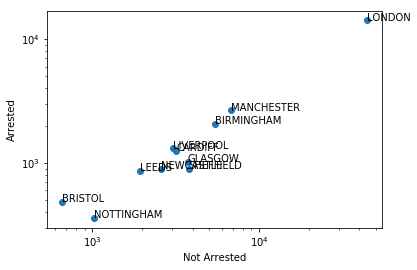

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

df_bycity.notnull()

x=df_bycity['Not Arrested']
y=df_bycity['Arrested']


fig, ax = plt.subplots()
ax.scatter(x, y)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel('Not Arrested')
ax.set_ylabel('Arrested')

for i, txt in enumerate(df_bycity.index):
    ax.annotate(txt, (x[i],y[i]))

Looks like Bristol is off the trend line?

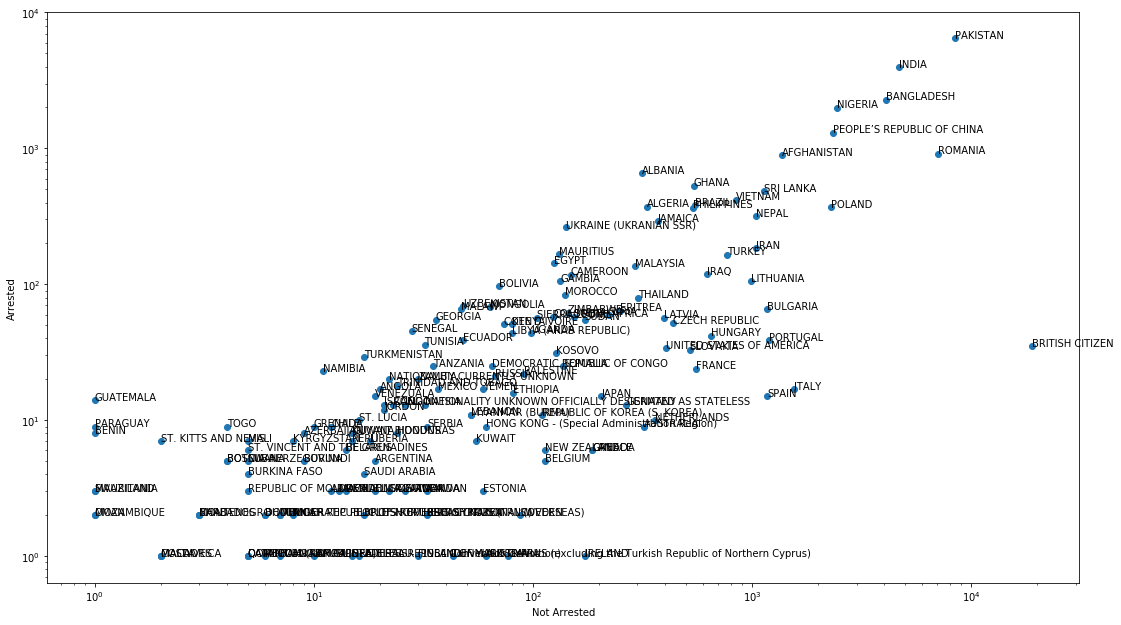

In [51]:
x=df_bynationality['Not Arrested']
y=df_bynationality['Arrested']

fig, ax = plt.subplots()
ax.scatter(x, y)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel('Not Arrested')
ax.set_ylabel('Arrested')

fig.set_size_inches(18.5, 10.5)

for i, txt in enumerate(df_bynationality.index):
    ax.annotate(txt, (x[i],y[i]))

## Saving the Dataframe as a CSV file

We can straightforwardly save the long form dataframe data to a CSV file.

In [52]:
mycsvfile = '../data/immigrationdata.csv'

#When saving the CSV data, don't save the dataframe index values
enc_merge_long.to_csv( mycsvfile, index=False)

In [53]:
#Preview the saved CSV data
#!head {mycsvfile}

## Create a Database from the pandas Dataframe

We can save a *pandas* dataframe to a SQLite3 database that allows it to be published using a service such as [datasette](https://github.com/simonw/datasette).

In [54]:
import sqlite3

In [55]:
dbname = '../db/immigration.db'

In [56]:
#Make sure we're working with a clean db
!rm {dbname}

In [57]:
conn = sqlite3.connect(dbname)

In [58]:
table = 'immigrationData'

enc_merge_long.to_sql(table, conn, index=False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:1534: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


Now we can run SQL queries on the data.

In [59]:
q = 'SELECT * FROM {} LIMIT 3'.format(table)

#Explicitly using suggested value of "immigrationData" for the table name
#q = 'SELECT * FROM immigrationData LIMIT 3'

pd.read_sql(q, conn)

,Nationality,City,Arrested,Not Arrested,Per Cent Arrested
0,AFGHANISTAN,BIRMINGHAM,189.0,222.0,45.985401
1,ALBANIA,BIRMINGHAM,40.0,27.0,59.701493
2,ALGERIA,BIRMINGHAM,7.0,10.0,41.176471


In [60]:
q = '''
SELECT City, SUM(Arrested) AS "Total Arrested",
        SUM("Not Arrested") AS "Total Not Arrested", 
        SUM(Arrested) + SUM("Not Arrested") AS "Total"
        FROM {} GROUP BY City
'''.format(table)
pd.read_sql(q, conn)

,City,Total Arrested,Total Not Arrested,Total
0,BIRMINGHAM,2056.0,5455.0,7511.0
1,BRISTOL,480.0,662.0,1142.0
2,CARDIFF,1244.0,3188.0,4432.0
3,GLASGOW,1025.0,3732.0,4757.0
4,LEEDS,864.0,1934.0,2798.0
5,LIVERPOOL,1309.0,3043.0,4352.0
6,LONDON,14160.0,44178.0,58338.0
7,MANCHESTER,2654.0,6838.0,9492.0
8,NEWCASTLE,893.0,2598.0,3491.0
9,NOTTINGHAM,358.0,1023.0,1381.0
